<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/filmes_exibidos(2009_2019).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import xlrd

In [2]:
df = pd.read_excel('https://oca.ancine.gov.br/sites/default/files/repositorio/excel/2120.xlsx', skiprows=2, skipfooter=20)
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [3]:
df.tail()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,39066,Fox,Distribuição Internacional,1671,5013
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,39997,Business Telecom,Distribuição Nacional,546,2529.5
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,40025,Universal,Distribuição Internacional,94588,870171
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,40151,Playarte,Distribuição Nacional,33291,303276
7080,2009,Última Parada - 174,B0800914800000,Ficção,Brasil,Brasileira,39745,Paramount,Distribuição Internacional,2107,8954


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Ano de exibição                  7081 non-null   int64 
 1   Título da obra                   7081 non-null   object
 2   CPB/ROE                          7081 non-null   object
 3   Gênero                           7081 non-null   object
 4   País(es) produtor(es) da obra    7081 non-null   object
 5   Nacionalidade da obra            7081 non-null   object
 6   Data de lançamento               7081 non-null   object
 7   Empresa distribuidora            7081 non-null   object
 8   Origem da empresa distribuidora  7081 non-null   object
 9   Público no ano de exibição       7081 non-null   object
 10  Renda (R$) no ano de exibição    7081 non-null   object
dtypes: int64(1), object(10)
memory usage: 608.6+ KB


In [5]:
df['Público no ano de exibição'].value_counts()

ND         29
40         23
200        17
14         17
38         16
           ..
4931        1
21318       1
134406      1
1012555     1
3563        1
Name: Público no ano de exibição, Length: 5075, dtype: int64

In [6]:
df_novo = df[df['Público no ano de exibição'] != 'ND'].copy()

df_novo['Público no ano de exibição'] = df_novo['Público no ano de exibição'].astype('int')
df_novo['Renda (R$) no ano de exibição'] = df_novo['Renda (R$) no ano de exibição'].astype('float')
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7052 entries, 0 to 7080
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano de exibição                  7052 non-null   int64  
 1   Título da obra                   7052 non-null   object 
 2   CPB/ROE                          7052 non-null   object 
 3   Gênero                           7052 non-null   object 
 4   País(es) produtor(es) da obra    7052 non-null   object 
 5   Nacionalidade da obra            7052 non-null   object 
 6   Data de lançamento               7052 non-null   object 
 7   Empresa distribuidora            7052 non-null   object 
 8   Origem da empresa distribuidora  7052 non-null   object 
 9   Público no ano de exibição       7052 non-null   int64  
 10  Renda (R$) no ano de exibição    7052 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 661.1+ KB


In [7]:
df_novo['Data de lançamento'].value_counts()

Relançamento    198
42341            33
41264            33
41607            29
41215            27
               ... 
40306             1
39423             1
41922             1
41913             1
43364             1
Name: Data de lançamento, Length: 878, dtype: int64

In [8]:
df_novo = df_novo[df_novo['Data de lançamento'] != 'Relançamento']
df_novo = df_novo[df_novo['Data de lançamento'] != 'relançamento']
df_novo["Data de lançamento"] = df_novo["Data de lançamento"].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6853 entries, 0 to 7080
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ano de exibição                  6853 non-null   int64         
 1   Título da obra                   6853 non-null   object        
 2   CPB/ROE                          6853 non-null   object        
 3   Gênero                           6853 non-null   object        
 4   País(es) produtor(es) da obra    6853 non-null   object        
 5   Nacionalidade da obra            6853 non-null   object        
 6   Data de lançamento               6853 non-null   datetime64[ns]
 7   Empresa distribuidora            6853 non-null   object        
 8   Origem da empresa distribuidora  6853 non-null   object        
 9   Público no ano de exibição       6853 non-null   int64         
 10  Renda (R$) no ano de exibição    6853 non-null   float64    

In [14]:
df_novo['Data de lançamento'].dt.year.value_counts()

2017    684
2013    674
2015    663
2018    649
2016    641
2014    626
2011    551
2012    537
2009    503
2010    476
2019    447
2008    225
2007     60
2006     49
2005     29
2004     10
2002      6
2001      5
2020      5
2003      4
1999      3
1998      2
2000      2
1978      1
1987      1
Name: Data de lançamento, dtype: int64

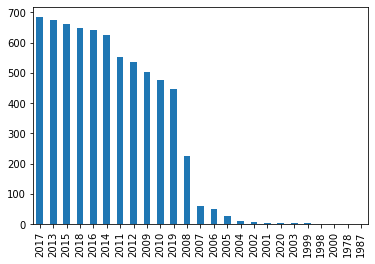

In [26]:
df_novo['Data de lançamento'].dt.year.value_counts().plot.bar();

In [20]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,19656467,338624881.0


In [24]:
df_novo.nlargest(5, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,19656467,338624881.0
472,2019,O Rei Leão,E1900267700000,Ficção,Estados Unidos,Estrangeira,2019-07-18,Disney,Distribuição Internacional,16242804,265786968.0
1375,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280,238020232.0
181,2019,Coringa,E1900357300000,Ficção,"Canadá, Estados Unidos",Estrangeira,2019-10-03,Warner,Distribuição Internacional,9746101,156781766.0
154,2019,Capitã Marvel,E1900011200000,Ficção,Estados Unidos,Estrangeira,2019-03-07,Disney,Distribuição Internacional,8991777,146759329.0


In [29]:
df_novo.nsmallest(5, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
849,2018,Colo*,E1700484800000,Ficção,Portugal,Estrangeira,2017-11-16,Zeta Filmes,Distribuição Nacional,0,0.0
862,2018,Coragem! As Muitas Vidas do Cardeal Dom Paulo ...,B1700537400000,Documentário,Brasil,Brasileira,2017-12-14,TV Meio Ambiente,Distribuição Nacional,0,0.0
996,2018,Jesus - A Esperança*,B1700447200000,Ficção,Brasil,Brasileira,2017-12-14,Moro Comunicação,Distribuição Nacional,0,0.0
1030,2018,Macaco Tião - O Candidato do Povo*,B1700051900000,Documentário,Brasil,Brasileira,2017-12-14,Pipa Produções,Distribuição Nacional,0,0.0
1211,2018,Pai em Dose Dupla 2*,E1700496000000,Ficção,Estados Unidos,Estrangeira,2017-11-23,Paramount,Distribuição Internacional,0,0.0


In [30]:
df_novo['Nacionalidade da obra'].value_counts()??

Estrangeira    4752
Brasileira     2101
Name: Nacionalidade da obra, dtype: int64